## Gold Price Prediction using Machine Learning with Python

## Mlops Work flow
* GOld price Data
* Data Preprocessing
* Data Analysis
* Train and test split
* Random Forest
* Model Evaluation

## IMPORT THE REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


### Loading the dataset


In [2]:
gold=pd.read_csv('/content/gld_price_data.csv')
#Check the Head of the first five rows
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
#Check the info of the dataset
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
#Check the shape f the dataset
gold.shape

(2290, 6)

In [5]:
#Check the null values of the dataset
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
#Check the statistical masures of the data
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
#Check the statiscal Measure
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
correlation=gold.corr()

<ipython-input-8-9b77001efbf7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold.corr()


<Axes: >

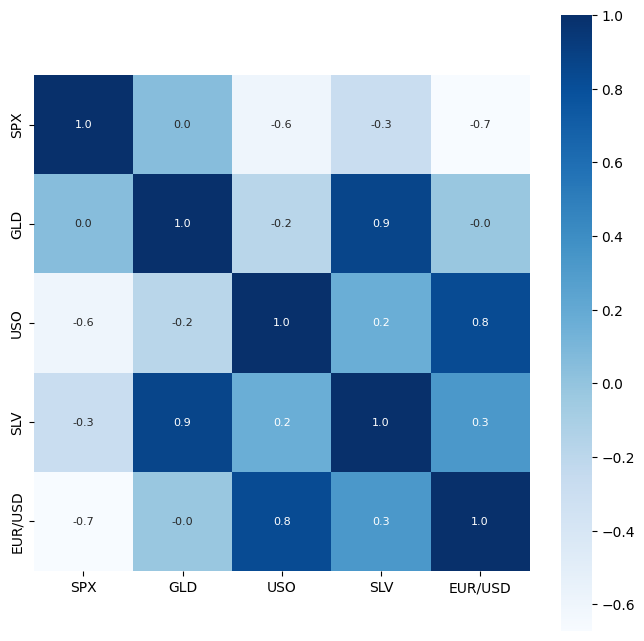

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [10]:
#Gold correlation
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-11-bc6d69874b32>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

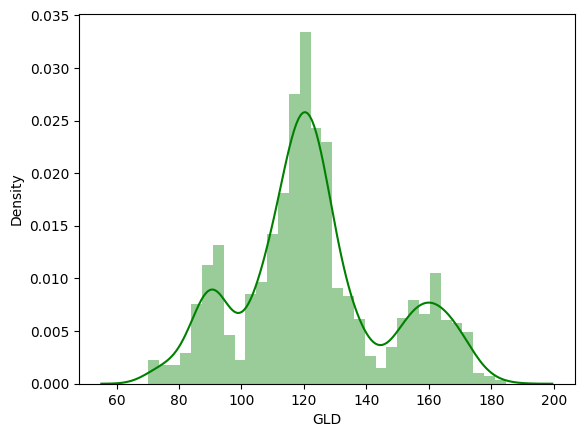

In [11]:
#dis of  gold price
sns.distplot(gold['GLD'],color='green')

## Spllitting the target and features

In [12]:
X=gold.drop(['Date','GLD'],axis=1)
Y=gold['GLD']

### divided into test and train data

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

## Model Training

In [15]:
regressor=RandomForestRegressor()

In [16]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

### Model Evaluation on traing data and testing data

In [18]:
train_data=regressor.predict(X_train)
error=metrics.r2_score(train_data,Y_train)
print("The Error for the model is ",error)

The Error for the model is  0.9985340178391449


In [19]:
test_data=regressor.predict(X_test)
error=metrics.r2_score(test_data,Y_test)
print("The Error for the model is ",error)

The Error for the model is  0.9889394375551835


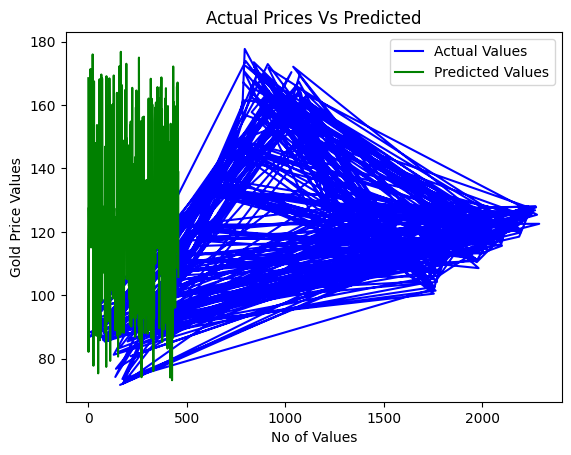

In [21]:
plt.plot(Y_test,color='blue',label='Actual Values')
plt.plot(test_data,color='green',label='Predicted Values')
plt.title('Actual Prices Vs Predicted')
plt.xlabel("No of Values")
plt.ylabel("Gold Price Values")
plt.legend()
plt.show()